# **Global Terrorism Database (GTD) - Exploratory Data Analysis**

## **Objective** 
The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.<br>

Explore and analyze the data to discover key findings pertaining to terrorist activities. <br>

## **Tools and Libraries used**
* Pandas 
* Numpy
* Seaborn
* Matplotlib
* Plotly
* geopy
* langid
* multiprocessing

##   **1. Data Collection & Understanding** 
1.  Importing the required librares for the operations
2.  Loading the dataset into pandas dataframe
3.  Look at some information about the data & the columns
4.  Understanding the data types of each columns 

### **1. Importing required libraries**

In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from geopy.geocoders import Nominatim
import langid
import multiprocessing
from multiprocessing import Pool

### Setting up plotting background
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 11
plt.rcParams['figure.facecolor'] = '#00000000'

In [3]:
import warnings
warnings.filterwarnings("ignore")

### **2. Loading the dataset into pandas dataframe**

In [4]:
### reading the csv file 
GTA_data  = pd.read_csv('/kaggle/input/gtd/globalterrorismdb_0718dist.csv',encoding = "ISO-8859-1")

In [5]:
### creating a copy of orginal data 
data = GTA_data.copy()

In [6]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#### **3. Checking the info. about data and columns**

In [7]:
data.shape

(181691, 135)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [9]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [10]:
""" Since the data consists of 135 feature columns I am checking the amount of missing/null values for each features which consists of 
                    more than  30% of missing values.  """
data.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

<AxesSubplot:>

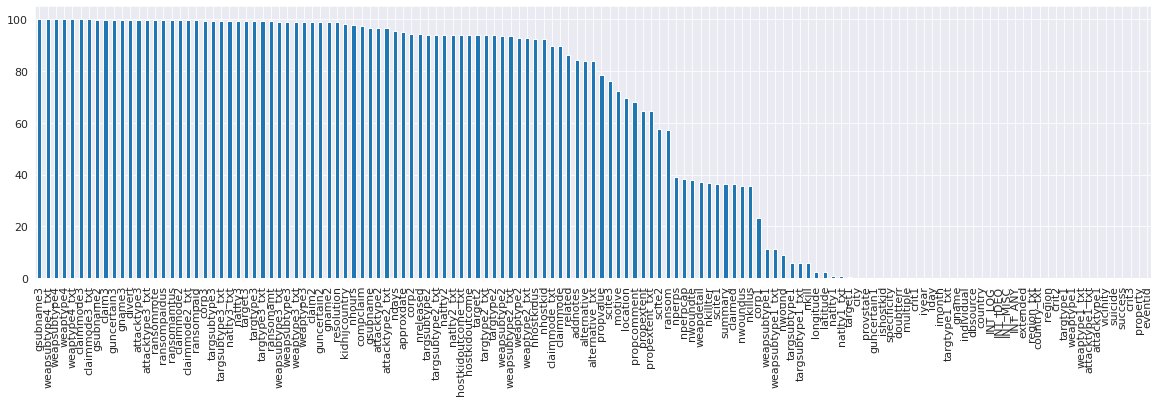

In [11]:
# Percentage of missing values per columns
plt.figure(figsize=(20, 5))
Missing_values_percent = ((data.isna().sum()/data.shape[0])*100).sort_values(ascending=False)
Missing_values_percent.plot(kind = 'bar')

In [12]:
print(f'The number of columns which have more than 50% of null values are:{ len(Missing_values_percent [Missing_values_percent >= 50])}')

The number of columns which have more than 50% of null values are:77


In [13]:
# # We are dropping all the 77 columns that are anyway not useful for this analysis 
# perc = 50
# thresh_count =  int(((100-perc)/100)*data.shape[0] + 1)
# data.dropna(axis=1, thresh=thresh_count,inplace = True)

In [14]:
# checking out remaining columns
Missing_values_percent [~(Missing_values_percent >= 50)].index

Index(['nperps', 'nperpcap', 'nwoundte', 'weapdetail', 'nkillter', 'scite1',
       'summary', 'claimed', 'nwoundus', 'nkillus', 'corp1', 'weapsubtype1',
       'weapsubtype1_txt', 'nwound', 'targsubtype1', 'targsubtype1_txt',
       'nkill', 'longitude', 'latitude', 'natlty1', 'natlty1_txt', 'target1',
       'city', 'provstate', 'guncertain1', 'ishostkid', 'specificity',
       'doubtterr', 'multiple', 'crit1', 'iyear', 'iday', 'imonth',
       'targtype1_txt', 'gname', 'individual', 'dbsource', 'country',
       'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'extended', 'region_txt',
       'country_txt', 'region', 'crit2', 'targtype1', 'weaptype1',
       'weaptype1_txt', 'attacktype1_txt', 'attacktype1', 'vicinity',
       'suicide', 'success', 'crit3', 'property', 'eventid'],
      dtype='object')

#### **4. Checking datatypes of each columns**

In [15]:
data.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [16]:
set(data.dtypes.values)

{dtype('int64'), dtype('float64'), dtype('O')}

##   **2. Data Cleaning and Manipulations** 
1.   Feature selection <br> 
2.   Checking for duplicates <br>
3.   Fixing the incorrect values if any <br>
4.   Handling the missing values (multiprocessing applied)<br>
5.   Adding new feature columns if required.<br>

#### **1. Feature Selections**
From the 135 columns Iam considering only following columns for my analyis: 
* eventid -  All the incidents are represented by 12-digit Event ID system 
            • First 8 numbers – date recorded “yyyymmdd”.
            • Last 4 numbers – sequential case number for the given day (0001, 0002 etc).
* iyear - year in which the incident occurred
* imonth - number of the month in which the incident occurred
* iday - day of the month on which the incident occurred
* extended  
        1 = "Yes" The duration of an incident extended more than 24 hours. 
        0 = "No" The duration of an incident extended less than 24 hours.
* country_txt -  country or location where the incident occurred
* region_txt -  region in which the incident occurred (12 regions are here in the data)
* city - name of the city, village, or town in which the incident occurred
* latitude -  latitude (based on WGS1984 standards) of the city where the event occurred
* longitude -  longitude (based on WGS1984 standards) of the city where the event occurred
* success - Success of a terrorist strike is defined according to the tangible effects of the attack
        1 = "Yes" The incident was successful. 
        0 = "No" The incident was not successful
* attacktype1_txt -  general method of attack and often reflects the broad class of tactics used
* targtype1_txt - general type of target/victim
* corp1 - Name of entity that was targeted
* target1 -  specific person, building, installation, etc.that was targeted and/or victimized and is a part of the entity named above
* natlty1_txt - This is the nationality of the target that was attacked, and is not necessarily the same as the  country in which the incident occurred, although in most cases it is. For hijacking incidents, the nationality of the plane is recorded and not that of the passengers
* 
* gname - name of the group that carried out the attack
* weaptype1_txt - types of the weapons used in an attack
* nkill -  number of total confirmed fatalities
* nwound - number of confirmed non-fatal injuries to both perpetrators and victims.
* property - Property Damage
        1 = "Yes" The incident resulted in property damage. 
        0 = "No" The incident did not result in property damage.
        -9 = "Unknown" It is unknown if the incident resulted in property damage.


In [17]:
# Selecting only required features from the above data for further analysis 
keep_cols = ['eventid', 'iyear', 'imonth', 'iday', 'extended','country_txt','region_txt','city', 'latitude',
       'longitude','success','attacktype1_txt', 'targtype1_txt','corp1', 'target1','natlty1_txt','targsubtype1_txt',
       'gname','weaptype1_txt','nkill','nwound','property']

# creating a new dataframe with selected features 
data_new = data[keep_cols]

In [18]:
### Updating the headers
data_new.rename(columns = {'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region',
                           'attacktype1_txt':'attack_type','targtype1_txt':'victim_cata','target1':'specific_victim','targsubtype1_txt':'victim_subtype_cata',
                           'corp1':'entity_name','natlty1_txt':'victim_nationaliy','gname':'perpetrator_group','weaptype1_txt':'weapon','nkill':'num_fatalities',
                           'nwound':'num_injured'},inplace = True)

In [19]:
data_new.head()

,eventid,year,month,day,extended,country,region,city,latitude,longitude,...,victim_cata,entity_name,specific_victim,victim_nationaliy,victim_subtype_cata,perpetrator_group,weapon,num_fatalities,num_injured,property
0,197000000001,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,...,Private Citizens & Property,NaN,Julio Guzman,Dominican Republic,Named Civilian,MANO-D,Unknown,1.0,0.0,0
1,197000000002,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,...,Government (Diplomatic),Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,0.0,0.0,0
2,197001000001,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,...,Journalists & Media,Voice of America,Employee,United States,Radio Journalist/Staff/Facility,Unknown,Unknown,1.0,0.0,0
3,197001000002,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,...,Government (Diplomatic),NaN,U.S. Embassy,United States,Embassy/Consulate,Unknown,Explosives,NaN,NaN,1
4,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,...,Government (Diplomatic),NaN,U.S. Consulate,United States,Embassy/Consulate,Unknown,Incendiary,NaN,NaN,1


In [20]:
data_new.describe()

,eventid,year,month,day,extended,latitude,longitude,success,num_fatalities,num_injured,property
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,171378.000000,165380.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,23.498343,-4.586957e+02,0.889598,2.403272,3.167668,-0.544556
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,18.569242,2.047790e+05,0.313391,11.545741,35.949392,3.122889
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,11.510046,4.545640e+00,1.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,31.467463,4.324651e+01,1.000000,0.000000,0.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,34.685087,6.871033e+01,1.000000,2.000000,2.000000,1.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,74.633553,1.793667e+02,1.000000,1570.000000,8191.000000,1.000000


#### **2. Checking for duplicates** 

In [21]:
data_new[data_new.duplicated()]

,eventid,year,month,day,extended,country,region,city,latitude,longitude,...,victim_cata,entity_name,specific_victim,victim_nationaliy,victim_subtype_cata,perpetrator_group,weapon,num_fatalities,num_injured,property


 Great! There are no duplicated rows are present in the datset.

#### **3. Handling incorrect values.**

In [22]:
### checking out the columns that contains 0 values for day and month 
data_new[(data_new.month == 0) | (data_new.day ==0)].shape

(891, 22)

There are 891 rows are present in the dataset that have 0 values provided for month and day column. 

In [23]:
### Checking the number of unique value counts in both month and day columns
data_new['month'].value_counts().sort_values(ascending= False),data_new['day'].value_counts().sort_values(ascending= False)

(5     16875
 7     16268
 8     15800
 10    15563
 6     15359
 3     15257
 4     15152
 1     14936
 11    14906
 9     14180
 2     13879
 12    13496
 0        20
 Name: month, dtype: int64,
 15    6500
 1     6344
 4     6153
 16    6112
 10    6064
 9     6057
 13    6043
 14    6028
 28    6027
 12    6012
 3     6011
 7     5997
 19    5973
 2     5954
 27    5937
 11    5936
 20    5930
 18    5880
 25    5875
 8     5859
 17    5852
 5     5844
 21    5827
 26    5823
 22    5799
 23    5782
 6     5781
 24    5752
 29    5507
 30    5046
 31    3095
 0      891
 Name: day, dtype: int64)

In [24]:
### replacing month 0 values with month 12
data_new.month.replace(0,5 , inplace = True)

### replacing day 0 values with day 31
data_new.day.replace(0,15, inplace = True)

#### **4. Handling Missing values**

In [25]:
missing_values = ((data_new.isna().sum()/data_new.shape[0])*100).sort_values(ascending= False)
missing_values

entity_name            23.418882
num_injured             8.977330
victim_subtype_cata     5.709144
num_fatalities          5.676120
longitude               2.508104
latitude                2.507554
victim_nationaliy       0.858050
specific_victim         0.350045
city                    0.238867
eventid                 0.000000
weapon                  0.000000
perpetrator_group       0.000000
attack_type             0.000000
victim_cata             0.000000
year                    0.000000
success                 0.000000
region                  0.000000
country                 0.000000
extended                0.000000
day                     0.000000
month                   0.000000
property                0.000000
dtype: float64

In [26]:
data_new[['num_injured','num_fatalities']] = data_new[['num_injured','num_fatalities']].fillna(method='ffill')
data_new[['entity_name','specific_victim','victim_nationaliy']] =data_new[['entity_name','specific_victim','victim_nationaliy']].fillna('Unknown')
data_new['victim_subtype_cata'] = data_new['victim_subtype_cata'].fillna('Unnamed Civilian/Unspecified')

In [27]:
print(data_new[data_new.city == 'Unknown']['city'].count())
print(data_new[data_new.city == 'unknown']['city'].count())
print(len(data_new[data_new.city.isna() == True]['city']))

9775
47
434


In [28]:
data_new.city = data_new.city.replace('unknown','Unknown')
data_new['city'] = data_new['city'].fillna('Unknown')
percent_city_unknown = len(data_new[data_new.city =='Unknown'])/len(data_new)*100
print(f'The percentage of total unkown values in the city columns {percent_city_unknown}')

The percentage of total unkown values in the city columns 5.644748501576853


In [29]:
data_new.city.value_counts()

Unknown      10256
Baghdad       7589
Karachi       2652
Lima          2359
Mosul         2265
             ...  
Hotwag           1
Ostend           1
Balughata        1
Jikoyi           1
Kubentog         1
Name: city, Length: 36673, dtype: int64

In [30]:
unknown_city_data = data_new[(data_new['longitude'].isna()== False) & (data_new['latitude'].isna()== False) & (data_new['city'] == 'Unknown')][['longitude','latitude','city']]
unknown_city_data.head()

,longitude,latitude,city
2,120.599741,15.478598,Unknown
705,49.536102,37.146795,Unknown
1007,-6.086832,54.552254,Unknown
1085,119.583330,23.583333,Unknown
1222,121.965256,17.092014,Unknown


In [31]:
print(f'The length of data which have unknown value for city column whose latitude and longitude is present is {len(unknown_city_data)}')

The length of data which have unknown value for city column whose latitude and longitude is present is 7961


#### Multiprocessing 

In [32]:
# geolocator = Nominatim(user_agent="http")

# def update_city(row):
#     try:
#         Longitude = str(row['longitude'])
#         Latitude = str(row['latitude'])
#         location = geolocator.reverse(Latitude+","+Longitude, exactly_one=True)
#         address = location.raw['address']
#         city = address.get('city', '')

#     ### Selecting the city name only in english language
#         if langid.classify(city)[0] =='en':
#             row['city'] = row['city'].replace('Unknown', str(city))
#         else:
#             row['city'] = row['city']
#         return row
    
#     except Exception as e:
#         print(e)
        
        
# def update_city2(df):
#     df2 = df.apply(update_city , axis = 1)
#     return df2


# df1 = unknown_city_data[0:2000]
# df2 = unknown_city_data[2000:4000]   
# #df1 = unknown_city_data[4000:6000]
# #df2 = unknown_city_data[6000:]   

# if __name__ == '__main__':
#     df = unknown_city_data
#     p = Pool()
#     result = p.map(update_city2,[df1,df2
#                                  ])
#     p.close()
#     p.join()
#     print(result)

In [33]:
#pd.concat(result,axis =0).to_csv('Geocoder_city.csv')

In [34]:
# df1 = unknown_city_data[4000:6000]
# df2 = unknown_city_data[6000:]   

# if __name__ == '__main__':
#     df = unknown_city_data
#     p = Pool()
#     result = p.map(update_city2,[df1,df2
#                                  ])
#     p.close()
#     p.join()
#     print(result)

In [35]:
#pd.concat(result,axis =0).to_csv('Geocoder_city1.csv')

In [36]:
#Geocoder_data_part1 = pd.read_csv('./Geocoder_city.csv')
#Geocoder_data_part2 = pd.read_csv('./Geocoder_city1.csv')

Geocoder_data_part1 = pd.read_csv('/kaggle/input/output-data/Geocoder_city.csv')
Geocoder_data_part2 = pd.read_csv('/kaggle/input/output-data/Geocoder_city1.csv')

city_data = pd.concat([Geocoder_data_part1,Geocoder_data_part2],axis = 0).set_index('Unnamed: 0')
city_data = city_data[(city_data.city !='Unknown') & (city_data.city.notnull())]

In [37]:
city_data.head()

,longitude,latitude,city
Unnamed: 0,,,
2,120.599741,15.478598,Tarlac City
1007,-6.086832,54.552254,Lisburn
3393,121.972109,6.705778,Isabela
3628,121.972109,6.705778,Isabela
6340,140.717000,-2.533000,Jayapura


In [38]:
def change_city(df1,df2):
    for i in df2.index:
        if i in df1.index:
            df1.loc[i, ['city']] = df2.loc[i,'city'] 
    return df1

In [39]:
change_city(data_new,city_data).head(5)

,eventid,year,month,day,extended,country,region,city,latitude,longitude,...,victim_cata,entity_name,specific_victim,victim_nationaliy,victim_subtype_cata,perpetrator_group,weapon,num_fatalities,num_injured,property
0,197000000001,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,...,Private Citizens & Property,Unknown,Julio Guzman,Dominican Republic,Named Civilian,MANO-D,Unknown,1.0,0.0,0
1,197000000002,1970,5,15,0,Mexico,North America,Mexico city,19.371887,-99.086624,...,Government (Diplomatic),Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,0.0,0.0,0
2,197001000001,1970,1,15,0,Philippines,Southeast Asia,Tarlac City,15.478598,120.599741,...,Journalists & Media,Voice of America,Employee,United States,Radio Journalist/Staff/Facility,Unknown,Unknown,1.0,0.0,0
3,197001000002,1970,1,15,0,Greece,Western Europe,Athens,37.997490,23.762728,...,Government (Diplomatic),Unknown,U.S. Embassy,United States,Embassy/Consulate,Unknown,Explosives,1.0,0.0,1
4,197001000003,1970,1,15,0,Japan,East Asia,Fukouka,33.580412,130.396361,...,Government (Diplomatic),Unknown,U.S. Consulate,United States,Embassy/Consulate,Unknown,Incendiary,1.0,0.0,1


In [40]:
data_new.city.value_counts()

Unknown           9949
Baghdad           7589
Karachi           2652
Lima              2362
Mosul             2265
                  ... 
Montalban            1
Enugu Ukwu           1
Sukanguri            1
Fila el Atillo       1
Kubentog             1
Name: city, Length: 36690, dtype: int64

In [41]:
((data_new.isna().sum()/data_new.shape[0])*100).sort_values(ascending= False)

longitude              2.508104
latitude               2.507554
eventid                0.000000
victim_cata            0.000000
num_injured            0.000000
num_fatalities         0.000000
weapon                 0.000000
perpetrator_group      0.000000
victim_subtype_cata    0.000000
victim_nationaliy      0.000000
specific_victim        0.000000
entity_name            0.000000
attack_type            0.000000
year                   0.000000
success                0.000000
city                   0.000000
region                 0.000000
country                0.000000
extended               0.000000
day                    0.000000
month                  0.000000
property               0.000000
dtype: float64

In [42]:
### checking out is there any missing values present in lat and long columns where city and region is not null
lat_long_missing = data_new[(data_new['longitude'].isna()== True) & 
                     (data_new['latitude'].isna()== True) & 
                     (data_new['city']!= 'Unknown') &     
                     (data_new['country']!= 'Unknown')][['longitude','latitude','city','country']]
len(lat_long_missing)

2261

In [43]:
lat_long_missing.head()

,longitude,latitude,city,country
210,NaN,NaN,Cauayan,Philippines
739,NaN,NaN,Tarlas,Philippines
2400,NaN,NaN,Ghinda,Ethiopia
2941,NaN,NaN,San Juan del Carare,Colombia
3169,NaN,NaN,Cavanilles,Spain


In [44]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_user_agent")
def find_lat_long(row):
    try:
        city = str(row['city'])
        country = str(row['country'])
        loc = geolocator.geocode(city+','+ country)
        #loc = geolocator.geocode(country,timeout=10)
        row['longitude'] = loc.longitude
        row['latitude'] = loc.latitude
        return row
    except:
         pass

In [45]:
#lat_long_missing_df = lat_long_missing.apply(find_lat_long,axis=1)
lat_long_missing_df = pd.read_csv('/kaggle/input/output-data1/lat_long_data.csv')

In [46]:
lat_long_missing_df = lat_long_missing_df[~lat_long_missing_df.longitude.isna()].set_index('Unnamed: 0')
lat_long_missing_df.head()

,longitude,latitude,city,country_name
Unnamed: 0,,,,
210,121.774390,16.933503,Cauayan,Philippines
2400,40.350000,4.200000,Ghinda,Ethiopia
3169,-0.583848,38.619806,Cavanilles,Spain
4941,-0.721047,37.929421,Calla,Spain
5331,-75.537811,9.907504,Barranca,Colombia


In [47]:
lat_long_missing_df.count()

longitude       909
latitude        909
city            909
country_name    909
dtype: int64

In [48]:
def replace_missing_lat_long(df1,df2):
    for i in df2.index:
        if i in df1.index:
            df1.loc[i, ['longitude']] = df2.loc[i,'longitude']
            df1.loc[i, ['latitude']] = df2.loc[i,'latitude']
        else:
            pass
    return df1

In [49]:
replace_missing_lat_long(data_new,lat_long_missing_df).head()

,eventid,year,month,day,extended,country,region,city,latitude,longitude,...,victim_cata,entity_name,specific_victim,victim_nationaliy,victim_subtype_cata,perpetrator_group,weapon,num_fatalities,num_injured,property
0,197000000001,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,...,Private Citizens & Property,Unknown,Julio Guzman,Dominican Republic,Named Civilian,MANO-D,Unknown,1.0,0.0,0
1,197000000002,1970,5,15,0,Mexico,North America,Mexico city,19.371887,-99.086624,...,Government (Diplomatic),Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,0.0,0.0,0
2,197001000001,1970,1,15,0,Philippines,Southeast Asia,Tarlac City,15.478598,120.599741,...,Journalists & Media,Voice of America,Employee,United States,Radio Journalist/Staff/Facility,Unknown,Unknown,1.0,0.0,0
3,197001000002,1970,1,15,0,Greece,Western Europe,Athens,37.997490,23.762728,...,Government (Diplomatic),Unknown,U.S. Embassy,United States,Embassy/Consulate,Unknown,Explosives,1.0,0.0,1
4,197001000003,1970,1,15,0,Japan,East Asia,Fukouka,33.580412,130.396361,...,Government (Diplomatic),Unknown,U.S. Consulate,United States,Embassy/Consulate,Unknown,Incendiary,1.0,0.0,1


In [50]:
((data_new[['longitude','latitude']].isna().sum()/data_new.shape[0])*100).sort_values(ascending= False)

longitude    2.007804
latitude     2.007254
dtype: float64

In [51]:
data_new = data_new.dropna()

#### 5. Creating new feature column

In [52]:
data_new['num_casualities'] = data_new['num_fatalities']+ data_new['num_injured']

In [53]:
data_new.describe()

,eventid,year,month,day,extended,latitude,longitude,success,num_fatalities,num_injured,property,num_casualities
count,1.780430e+05,178043.000000,178043.000000,178043.000000,178043.000000,178043.000000,1.780430e+05,178043.000000,178043.000000,178043.000000,178043.000000,178043.000000
mean,2.002907e+11,2002.840437,6.469342,15.584179,0.044574,23.440287,-4.563225e+02,0.888504,2.434013,3.170493,-0.561381,5.604506
std,1.322403e+09,13.223937,3.387659,8.746574,0.206366,18.567782,2.042556e+05,0.314746,11.586003,34.910784,3.139863,41.291946
min,1.970000e+11,1970.000000,1.000000,1.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,-9.000000,0.000000
25%,1.991051e+11,1991.000000,4.000000,8.000000,0.000000,11.391125,4.291111e+00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.009060e+11,2009.000000,6.000000,15.000000,0.000000,31.379885,4.323489e+01,1.000000,0.000000,0.000000,1.000000,1.000000
75%,2.014082e+11,2014.000000,9.000000,23.000000,0.000000,34.666667,6.871789e+01,1.000000,2.000000,2.000000,1.000000,4.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,74.633553,1.793667e+02,1.000000,1570.000000,8191.000000,1.000000,9574.000000


## **3. Exploratory Data Analysis & Visualizations**
Univariate Analysis | Bivariate Analysis |  Multivariate Analysis

In [54]:
# Numeric columns in the dataset
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_new.select_dtypes(include=numerics).columns

Index(['eventid', 'year', 'month', 'day', 'extended', 'latitude', 'longitude',
       'success', 'num_fatalities', 'num_injured', 'property',
       'num_casualities'],
      dtype='object')

### 1. Checking the unique years present in the dataset & yearly distribution of data

In [55]:
### distinct years in the dataset
data_new.year.unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

The dataset consists of yearly data from 1970 to 2012 except 1993

<AxesSubplot:xlabel='year', ylabel='Density'>

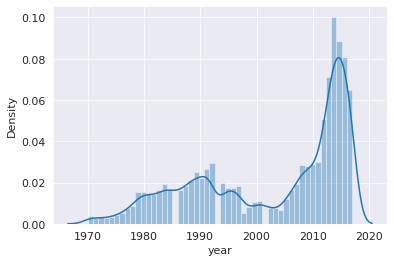

In [56]:
sns.distplot(data_new.year)

### 2. Howmany accidents extended more than 24 hours and howmany are not?

Text(0.5, 1.0, 'duration of an incident (extended more than 24 hours or not)')

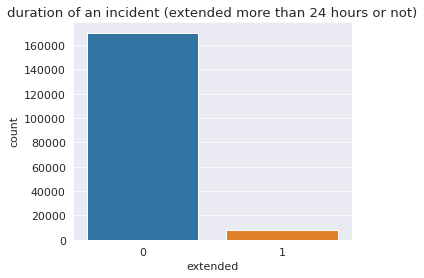

In [57]:
plt.figure(figsize=(5,4))
sns.countplot('extended', data=data_new)
plt.title('duration of an incident (extended more than 24 hours or not)')

It seems like majority of the accidents doesnot extended more than 24 hours

### 3. Number of successful and unsuccessful accidents

Text(0.5, 1.0, 'Number of Successful and unsuccessful attacks')

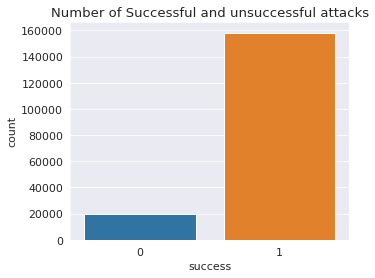

In [58]:
plt.figure(figsize=(5,4))
sns.countplot('success', data=data_new)
plt.title('Number of Successful and unsuccessful attacks')

Majority of the accidents are reported as successful 

### 4. Checking out the relationships between 'property','num_casualities' and 'success' columns.
I am explicitly checking whether any observations are present in the data which didn't result in any casualties with zero property damage and were reported as successful. Such columns are considered incorrect values. If any such columns are present in the data we may have to do some further treatment for wrong values.

Text(0.5, 1.0, 'Types of property damage during attacks')

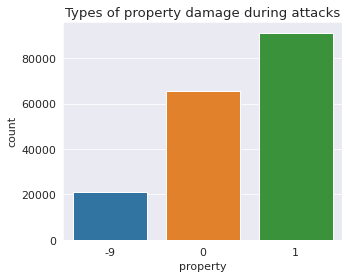

In [59]:
plt.figure(figsize=(5,4))
sns.countplot('property', data=data_new)
plt.title('Types of property damage during attacks')

In [60]:
# There are several incidents which doesnt cause to any casualities 
zero_casuality_attack=  data_new[data_new.num_casualities == 0]
zero_casuality_attack['eventid'].count()

65804

There are 65804 data are reported which didn't lead to caualities. Aganin checking howmany of them  doesn't cause any property damage?

Text(0.5, 1.0, 'Types of property damage during attacks')

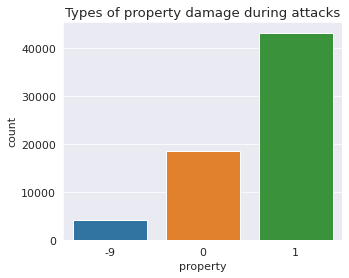

In [61]:
plt.figure(figsize=(5,4))
sns.countplot('property', data=zero_casuality_attack)
plt.title('Types of property damage during attacks')

In [62]:
non_harm_attack = zero_casuality_attack[zero_casuality_attack.property == 0]
non_harm_attack['success'].value_counts()

0    10716
1     7811
Name: success, dtype: int64

There are 18527 attacks took place which doesn't cause any casualities or property damages. But among these data 7811 attacks are recorded as successful. Which means 7811 recores are present in the data which points out 0 casualities, 0 property damages and successful. 

So I am assuming the curresponding attacks results in some property damages. 


In [63]:
data_new.loc[(data_new.property == 0) & (data_new.num_casualities == 0) & (data_new.success == 1)]['property'] = 1

### 5. Correlation Plot

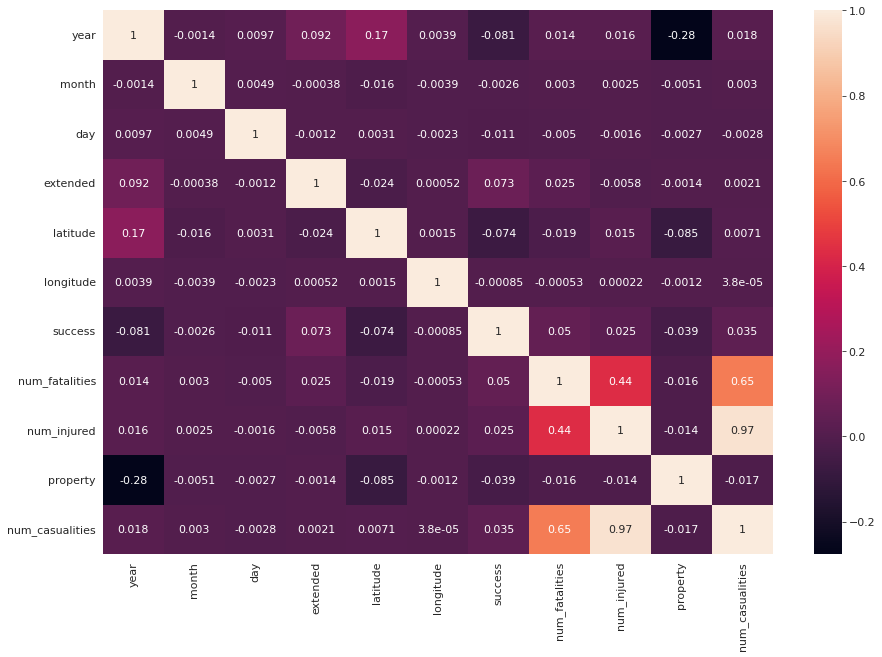

In [64]:
plt.figure(figsize=(15,10))
sns.heatmap(data_new.drop('eventid',axis = 1).corr(), annot= True)
plt.show()

### 6. Number of Successful and Unsuccessful attacks per year

In [65]:
plt.rcParams['figure.figsize'] = (15, 7)
fig = px.histogram(data_new, 
                   x='year', 
                   color = 'success', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Number of terrorist attack per year')
fig.update_layout(bargap=0.1)
fig.update_xaxes(tickangle= -90)
fig.show()

### 7. Global trends in terrorism 
Comparing the deaths toll,injured,property damage with respect to the trends in number of accidents.

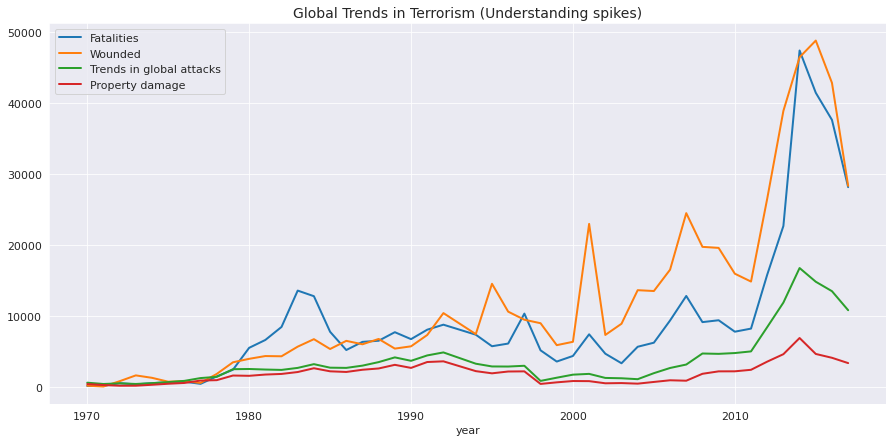

In [66]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Global Trends in Terrorism (Understanding spikes)', size = 14)
data_new.groupby('year')['num_fatalities'].sum().plot(linewidth=2,label = 'Fatalities')
data_new.groupby('year')['num_injured'].sum().plot(linewidth=2,label = 'Wounded' )
data_new.groupby('year')['eventid'].count().plot(linewidth=2, label = 'Trends in global attacks')
data_new[data_new.property  == 1].groupby('year')['property'].sum().plot(linewidth=2, label = 'Property damage')
plt.legend()
plt.show()

### 8. Effect of top most deadliest wars in the history 
        1. Syrian Civil War (2015) 
        2. Iraq War
        3. Afghanistan War
        4. The War Against Boko Haram (Nigeria)

In [67]:
after_2000_df = data_new[data_new['year'].between(2000, 2016)]

top_wars_df = after_2000_df[(after_2000_df.country =='Iraq')|
                       (after_2000_df.country =='Pakistan')|
                       (after_2000_df.country =='Afghanistan')|
                       (after_2000_df.country =='Syria')]

remaining_world_df = after_2000_df[(after_2000_df.country !='Iraq')&
                       (after_2000_df.country !='Pakistan')&
                       (after_2000_df.country !='Afghanistan')&
                       (after_2000_df.country !='Syria')]

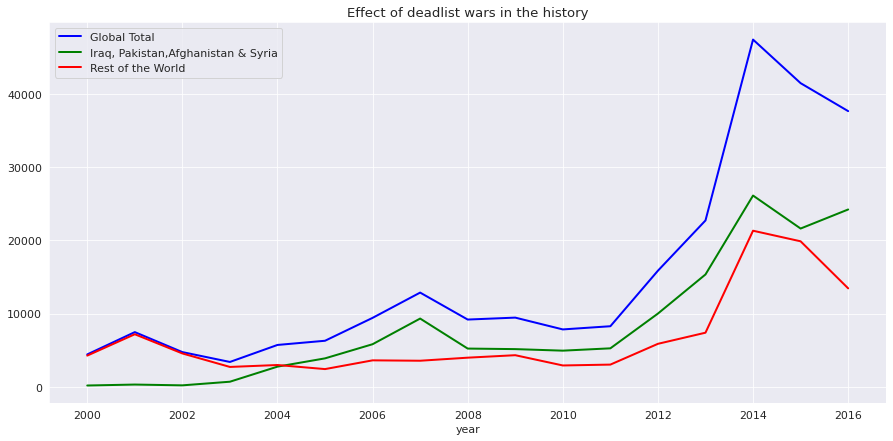

In [68]:
### plotting the data
plt.rcParams['figure.figsize'] = (15, 7)
after_2000_df.groupby('year')['num_fatalities'].sum().plot(kind='line',
                                                           color = 'blue',
                                                           linewidth=2,
                                                          label = 'Global Total')
top_wars_df.groupby('year')['num_fatalities'].sum().plot(kind='line',
                                                         color = 'green',
                                                         linewidth=2 ,
                                                        label = 'Iraq, Pakistan,Afghanistan & Syria')
remaining_world_df.groupby('year')['num_fatalities'].sum().plot(kind='line',
                                                                linewidth=2 ,
                                                                color = 'red',
                                                               label = 'Rest of the World')
plt.title('Effect of deadlist wars in the history')
plt.legend()
plt.show()

### 9. Distinct regions exist in the dataset & Top 20 affected countries

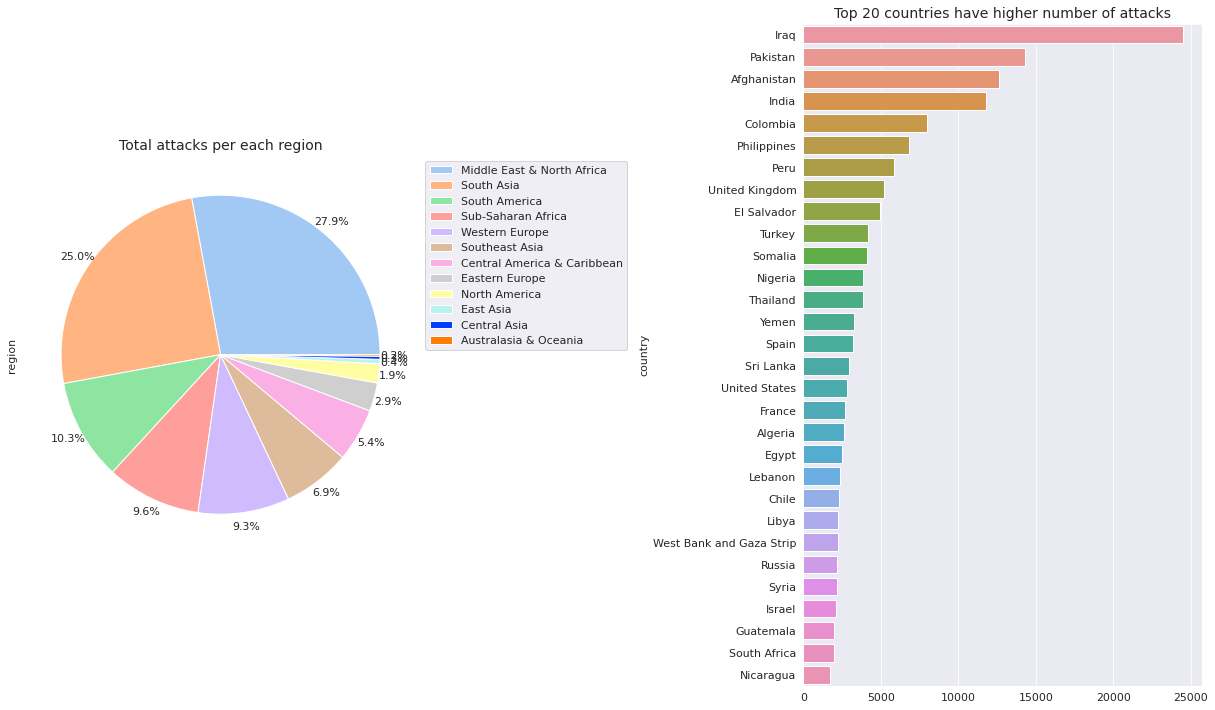

In [69]:
plt.figure(figsize=(17, 10))
ax1 = plt.subplot(121)
colors = sns.color_palette('pastel')[0:10]+sns.color_palette('bright')[0:2]
data_new.region.value_counts().plot(kind='pie',autopct="%.1f%%",pctdistance= 1.09, colors = colors,labels = None)
                                              # ,rotatelabels=True,labeldistance=1)
ax1.legend(labels =data_new.region.value_counts().index, bbox_to_anchor = (1,1),loc = 2)
ax1.set_title('Total attacks per each region',size = 14)
ax2 = plt.subplot(122)
sns.barplot(x =data_new.groupby('country').eventid.count().sort_values(ascending=False)[:30].values , 
            y = data_new.groupby('country').eventid.count().sort_values(ascending=False)[:30].index )
ax2.set_title('Top 20 countries have higher number of attacks',size = 14)
plt.tight_layout()
plt.show()

### 10. Top 50 targeted cities in the history

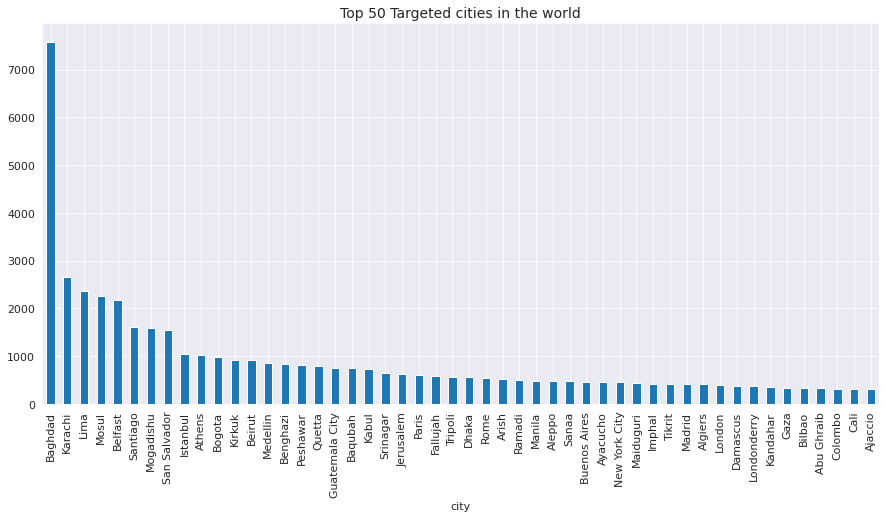

In [70]:
target_cities = data_new[data_new.city != 'Unknown'].groupby(['city'])['eventid'].count().sort_values(ascending= False)[:50]
target_cities.plot(kind ='bar',
                   figsize=(15, 7),
                   )
plt.title('Top 50 Targeted cities in the world',size = 14)
plt.show()

### 11. Top 10 active terrorist groups in the most affected city (Baghdad)

In [71]:
baghdad_df = data_new[data_new.city == 'Baghdad']
baghdad_df.groupby('perpetrator_group')['eventid'].count().sort_values(ascending = False)[:10]

perpetrator_group
Unknown                                        6535
Islamic State of Iraq and the Levant (ISIL)     622
Al-Qaida in Iraq                                216
Islamic State of Iraq (ISI)                      57
Tawhid and Jihad                                 22
Gunmen                                           15
Mahdi Army                                       13
Sunni Muslim extremists                           8
Asa'ib Ahl al-Haqq                                8
Muslim extremists                                 8
Name: eventid, dtype: int64

### 12. Trends of attack in top affected city (Baghdad) in each year.

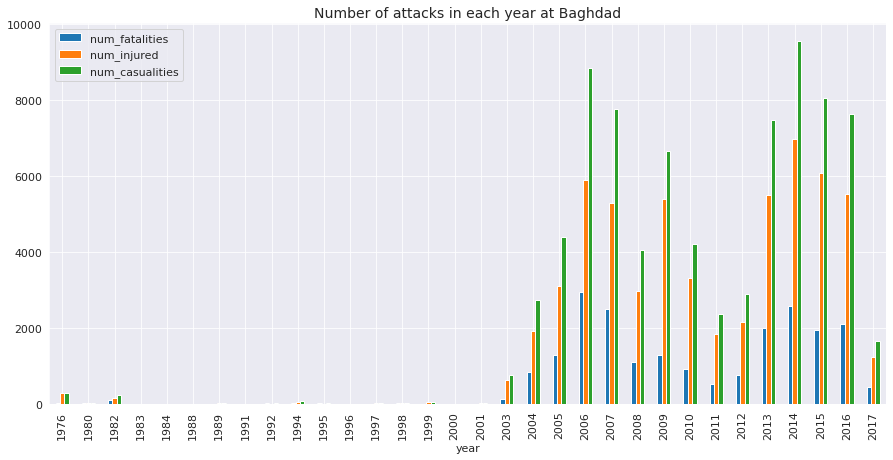

In [72]:
baghdad_casualities = baghdad_df.groupby('year')['num_fatalities','num_injured','num_casualities'].sum()
baghdad_casualities.plot(kind='bar',figsize=(15, 7))
plt.title('Number of attacks in each year at Baghdad',size = 14)
plt.show()

https://www.vox.com/a/maps-explain-crisis-iraq

https://www.britannica.com/list/10-things-you-need-to-know-about-the-hamilton-burr-duel-according-to-hamiltons-burr

### 13. The total num. of fatalities, injured and casualties by Region

In [73]:
data_by_region = data_new.groupby('region')['num_fatalities','num_injured','num_casualities'].sum()
data_by_region 

,num_fatalities,num_injured,num_casualities
region,,,
Australasia & Oceania,162.0,273.0,435.0
Central America & Caribbean,36183.0,12471.0,48654.0
Central Asia,946.0,1932.0,2878.0
East Asia,1176.0,9257.0,10433.0
Eastern Europe,8293.0,12586.0,20879.0
Middle East & North Africa,142528.0,226677.0,369205.0
North America,5023.0,21650.0,26673.0
South America,32184.0,20916.0,53100.0
South Asia,102236.0,145154.0,247390.0


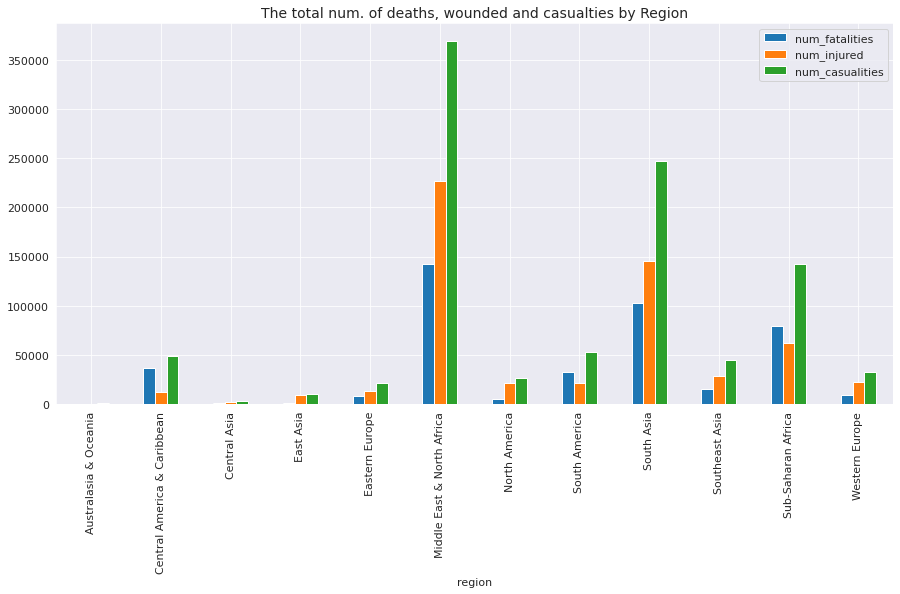

In [74]:
data_by_region.plot(kind = 'bar',figsize=(15, 7))
plt.title('The total num. of deaths, wounded and casualties by Region',size = 14)
plt.show()

### 14. Attacks by region and year

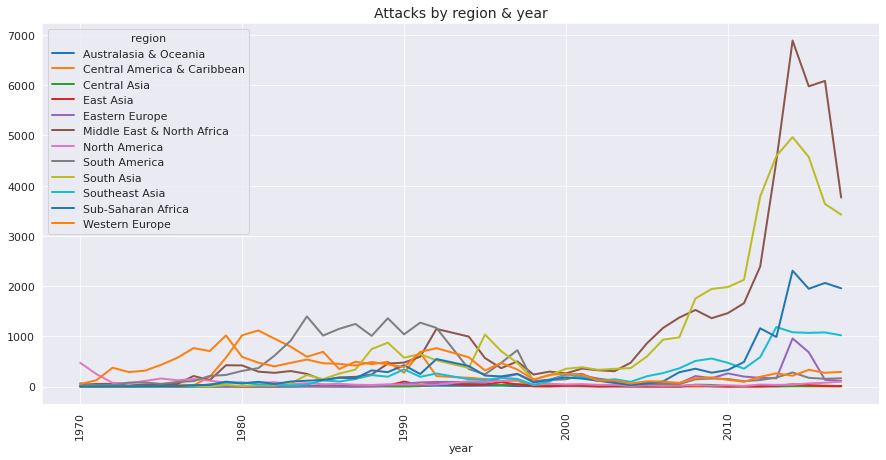

In [75]:
pd.crosstab(data_new.year, data_new.region).plot(kind='line',
                                                 stacked=False,figsize=(15,7),
                                                 linewidth=2,rot = 90)
plt.title('Attacks by region & year',size = 14)
plt.show()

#### 15. Howmany distinct countries exist in each region of the dataset

In [76]:
region_country_df = data_new[['region','country']]
region_df = region_country_df.groupby('region').agg(set)

def count_counties(row):
  row['unique_country_count'] = len(row['country'])
  return row

region_df.apply(count_counties, axis = 1)

,country,unique_country_count
region,,
Australasia & Oceania,"{New Caledonia, Vanuatu, Papua New Guinea, Sol...",10
Central America & Caribbean,"{Haiti, Panama, Dominican Republic, Barbados, ...",21
Central Asia,"{Turkmenistan, Azerbaijan, Armenia, Uzbekistan...",8
East Asia,"{South Korea, Hong Kong, North Korea, Japan, T...",7
Eastern Europe,"{Yugoslavia, Slovak Republic, Moldova, Bosnia-...",26
Middle East & North Africa,"{Egypt, Morocco, Kuwait, Iraq, Yemen, North Ye...",23
North America,"{Canada, United States, Mexico}",3
South America,"{Uruguay, Venezuela, Peru, Colombia, Bolivia, ...",14
South Asia,"{Nepal, Sri Lanka, Pakistan, Mauritius, Bhutan...",9


### 16. Methodes of attacks by count 

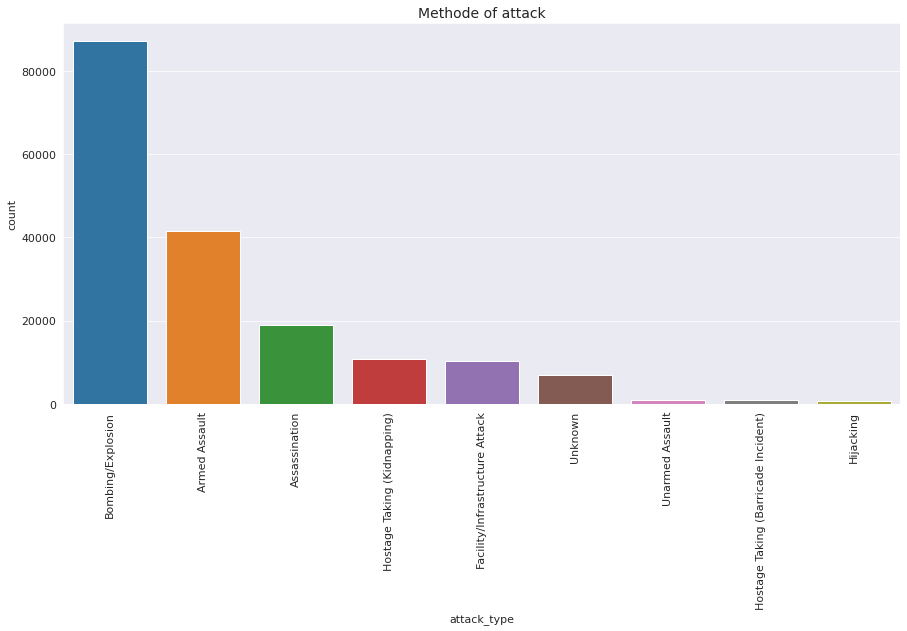

In [77]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(x="attack_type", data= data_new, order=data_new.attack_type.value_counts().index)
plt.title('Methode of attack', size = 14)
plt.xticks(rotation=90)
plt.show()

#### 17. Victims of Terrorist attacks

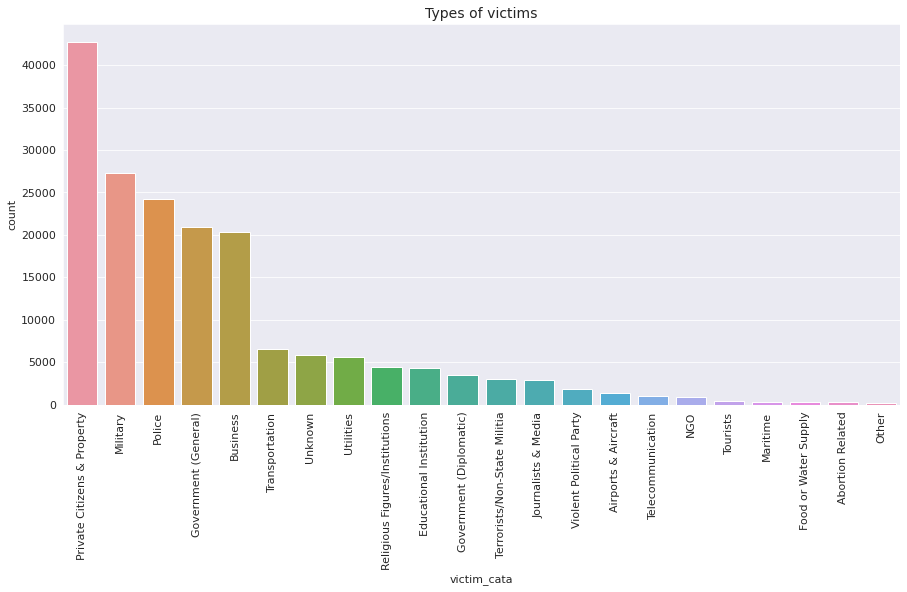

In [78]:
### types of victims of attack
plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(x="victim_cata", data= data_new, order=data_new.victim_cata.value_counts().index)
plt.title('Types of victims', size = 14)
plt.xticks(rotation=90)
plt.show()

### 18. Top 25 active terror groups in history

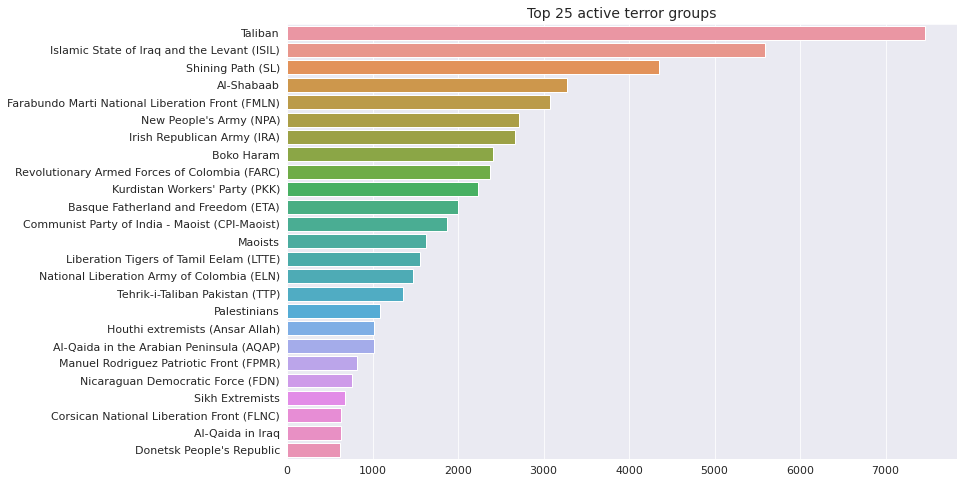

In [79]:
plt.rcParams['figure.figsize'] = (12, 8)
active_groups = data_new[data_new['perpetrator_group'] !='Unknown']
sns.barplot(active_groups['perpetrator_group'].value_counts()[:25].values,active_groups['perpetrator_group'].value_counts()[:25].index)
plt.title('Top 25 active terror groups', size = 14)
plt.show()

### 19. Most acive groups and their most targeted cities  

In [80]:
df = active_groups.groupby(['perpetrator_group','country']).agg({'eventid':'count','num_fatalities':'sum',
                                                                     'num_injured':'sum','property':'count'
                                                                     , 'year':set})
df = df.sort_values('eventid',ascending= False)
df.head(10)

,,eventid,num_fatalities,num_injured,property,year
perpetrator_group,country,,,,,
Taliban,Afghanistan,7403,30342.0,29598.0,7403,"{2016, 2017, 1995, 2001, 2002, 2003, 2004, 200..."
Islamic State of Iraq and the Levant (ISIL),Iraq,4781,32418.0,25381.0,4781,"{2016, 2017, 2013, 2014, 2015}"
Shining Path (SL),Peru,4331,12103.0,4195.0,4331,"{1978, 1979, 1980, 1981, 1982, 1983, 1984, 198..."
Farabundo Marti National Liberation Front (FMLN),El Salvador,3051,11961.0,4964.0,3051,"{1984, 1985, 1986, 1987, 1988, 1989, 1990, 199..."
Al-Shabaab,Somalia,2861,9604.0,8164.0,2861,"{2016, 2017, 2007, 2008, 2009, 2010, 2011, 201..."
New People's Army (NPA),Philippines,2712,4246.0,3462.0,2712,"{1970, 1976, 1977, 1978, 1979, 1980, 1981, 198..."
Irish Republican Army (IRA),United Kingdom,2575,2135.0,5737.0,2575,"{1970, 1971, 1972, 1973, 1974, 1975, 1976, 197..."
Revolutionary Armed Forces of Colombia (FARC),Colombia,2360,5638.0,5193.0,2360,"{1975, 1976, 1977, 1978, 1979, 1980, 1981, 198..."
Boko Haram,Nigeria,2083,18123.0,9712.0,2083,"{2016, 2017, 2009, 2010, 2011, 2012, 2013, 201..."


### 20. Methode of attack VS duration of attack

In [81]:
extended_attack_df = data_new[data_new['extended'] == 1]
non_extended_attack_df = data_new[~ (data_new['extended'] == 1)]

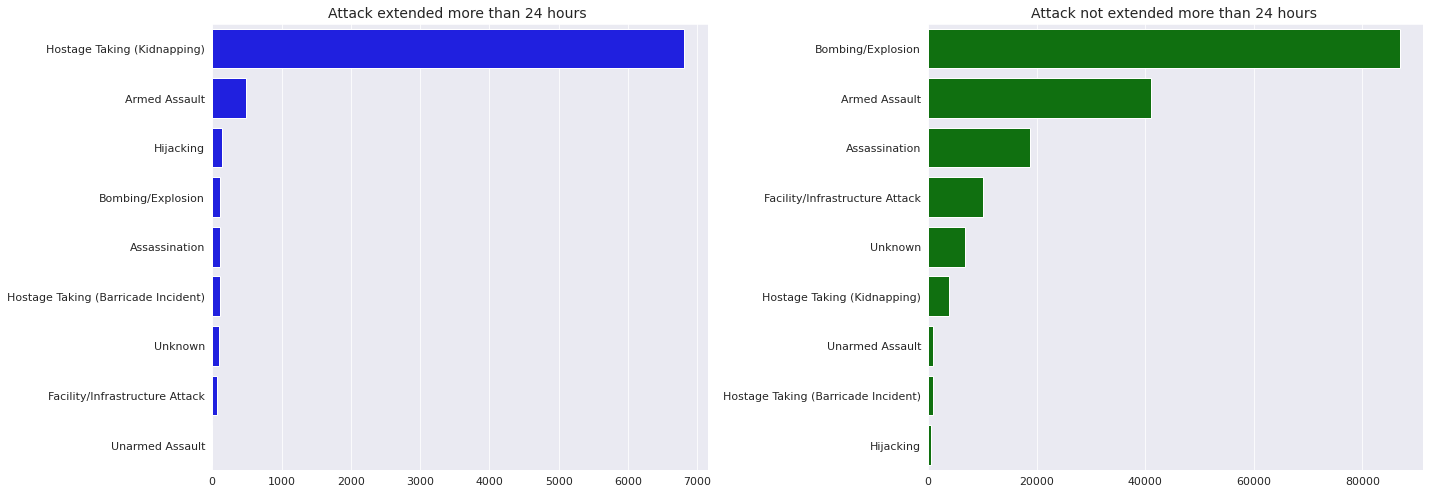

In [82]:
plt.figure(figsize=(20, 7))
ax1 = plt.subplot(121)
sns.barplot(extended_attack_df['attack_type'].value_counts().values,extended_attack_df['attack_type'].value_counts().index, color='blue')
ax1.set_title('Attack extended more than 24 hours ',size = 14)
ax2 = plt.subplot(122)
sns.barplot(non_extended_attack_df['attack_type'].value_counts().values,non_extended_attack_df['attack_type'].value_counts().index, color='green')
ax2.set_title('Attack not extended more than 24 hours ',size = 14)
plt.tight_layout()
plt.show()

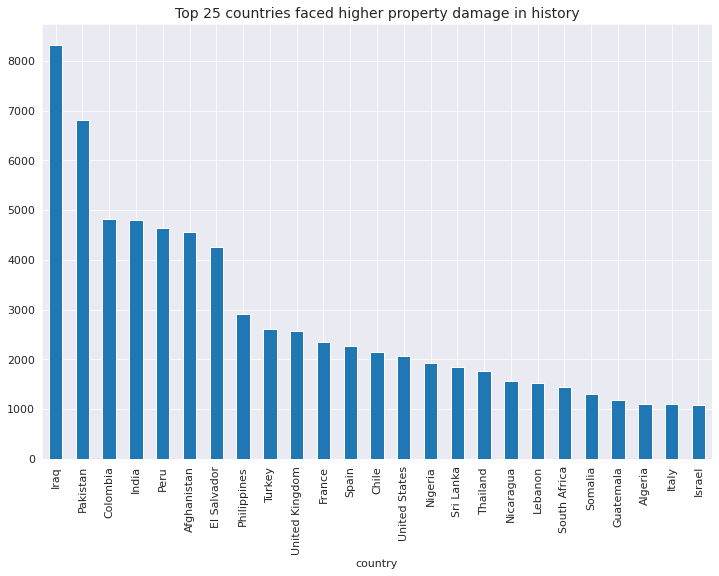

In [83]:
### top 25 countries faced higher property damage
plt.rcParams['figure.figsize'] = (12, 8)
property_damage = data_new[data_new.property  == 1] 
property_damage.groupby('country')['property'].count().sort_values(ascending  =False)[:25].plot(kind ='bar')
plt.title('Top 25 countries faced higher property damage in history', size = 14)
plt.show()

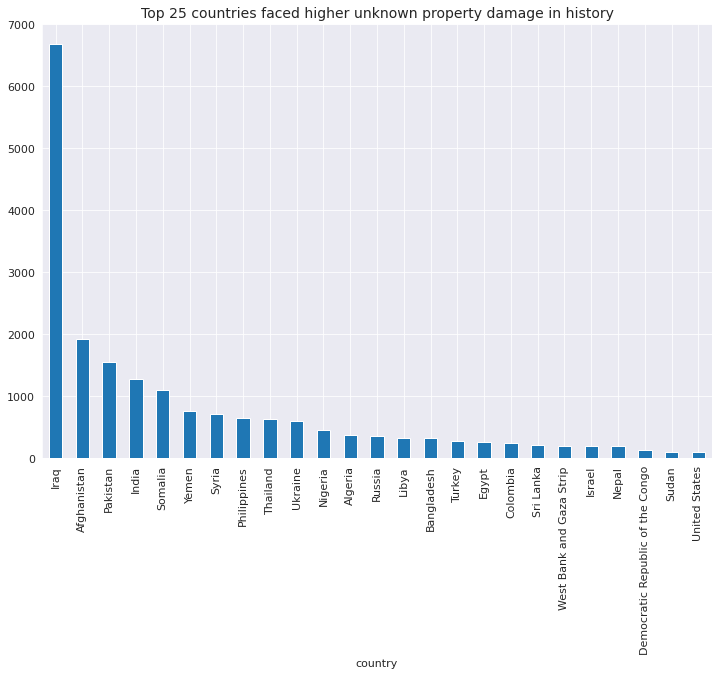

In [85]:
plt.rcParams['figure.figsize'] = (12, 8)
property_damage = data_new[data_new.property  == -9] 
property_damage.groupby('country')['property'].count().sort_values(ascending  =False)[:25].plot(kind ='bar')
plt.title('Top 25 countries faced higher unknown property damage in history', size = 14)
plt.show()

## **Ask & answer questions**

* Which year has the highest number of attacks during 1970-2017?  Compare the terror attack trend each year.
* Compare the number of fatalities, wounds and property damages with respect to the trend in attacks. Identify the years with  least & most  casualties and terror attacks.
* Comment the influence of top most deadliest wars in the history with the help of appropriate visualization tools . For this purpose consider following wars: 
            1. Syrian Civil War, 
            2. Iraq War,
            3. Afghanistan War
            4. The War Against Boko Haram (Nigeria)
* What are the top 20 higher target countries? Comment the regions with respect to the percentage of attack.
* Identify the 50 targeted cities in the history.
* Compare the terror attack trend in each regions with respect to the years. Comment the adverse outcomes after these disasters. 
* What kinds of weapons are used in terror attacks?
* Who are the common victims of terror attacks ?
* Who are the top 20 active terror groups ? And their top targeted countries? Also mention the period of attack & post event outcomes in the findout cities
* Explore the relationships between the methode of attack and duration of attack ?
* Findout the top 25 countries with different property damages.

## **Summary and Conclusions**
#### **Insights:**
* 1973 is the lowest period of attacks in the data and 2014 is the peak period of the terror attacks.
* All the three, the number of fatalities,number of wounded and total number of attacks are connected each other. From 2000, the number of fatalities and wounds showing a sudden upward trend compared to the previous years and plummeted after 2014.

## **Challenges Faced** 